### fastText Trainning

In [33]:
import fasttext as ft
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
epoch = 30
dim = 100
actions_txt_path = r".\data\actions_txt"
Edudata = r'.\data\EduData_20221028'
model_path = r".\model"
course = "ALL-2020"

In [ ]:
# training fastText model
model = ft.train_unsupervised(actions_txt_path + r"\actions_ALL-2020.txt",  model='skipgram',minCount=1, dim=dim, epoch=epoch)
model.save_model(model_path+r"\fastText_train{}_{}dim_{}epoch.bin".format(course,dim,epoch))

In [28]:
# model that is used in our paper
model = ft.load_model(r".\EDM_src\model\fasttext_ALL-2020_paperused.bin")

# Section 5

### Table6

In [29]:
model.get_nearest_neighbors("Nm")

[(0.8475688695907593, 'NmONm'),
 (0.7377142906188965, 'NmOsCNm'),
 (0.7254133224487305, 'NmENm'),
 (0.7147713899612427, 'NmGPNm'),
 (0.706501305103302, 'JmONm'),
 (0.6979610919952393, 'NmCmONm'),
 (0.6719402074813843, 'OJNm'),
 (0.6714886426925659, 'EmPNm'),
 (0.6696686148643494, 'NONm'),
 (0.6662645936012268, 'NmPNm')]

### Table7

In [30]:
model.get_nearest_neighbors("NNNNsNmNsNsPl")

[(0.9425984621047974, 'NNNNsNmNsNsPm'),
 (0.892768144607544, 'NNNsNmNsPl'),
 (0.8683958649635315, 'NONNNNsNmNsNl'),
 (0.8634963631629944, 'NNNNsNsNmNsPm'),
 (0.8542118072509766, 'NNNsNmNs'),
 (0.8533670902252197, 'NNNNNsNmNs'),
 (0.8527016043663025, 'NNNNNsNmNsNsNm_'),
 (0.8472810983657837, 'ONNNsNmNsNsPPm_'),
 (0.8436266183853149, 'OmNNNsNsNmNsPl'),
 (0.834399938583374, 'NNNsNsNmNs')]

### Figure 5 & 6

In [37]:
words = ft.load_model(r"C:\Users\miyazakiyuma\code\python\EDM_src\model\forFig5_6_wordsD-2022.bin").words

In [38]:
word_df = pd.DataFrame()
for word in words:
    w_vec = model.get_word_vector(word)
    w_s = pd.DataFrame(np.array(w_vec).reshape(1,100))
    word_df = pd.concat([word_df,w_s])
word_df["word"] = words
word_df = word_df.set_index("word")

In [39]:
word_df

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
word,,,,,,,,,,,,,,,,,,,,,
</s>,-0.325997,0.122831,-0.602079,-0.562581,0.458582,0.508243,-0.161879,0.114481,0.373423,0.219539,...,0.047207,-0.167376,0.268111,0.363091,0.299751,0.236608,-0.129607,0.263765,-0.016799,0.275886
Nm,-1.350062,0.378795,-1.127691,-1.743722,0.372002,-0.441857,-0.857010,-0.859932,-0.111223,0.706648,...,-1.298898,-0.354445,1.214130,0.933352,-0.378536,1.200958,0.311046,2.294353,0.282391,0.731450
Nl,-0.091980,-0.091260,-0.635514,-1.974128,0.271160,0.424462,-1.113505,-0.164160,-1.238673,-0.162161,...,-1.583300,-0.521272,-0.428247,1.276414,0.049389,1.857374,0.249622,1.239706,-0.315286,0.196229
Cl,1.073069,-0.523453,-0.674544,-0.425263,0.757349,1.036664,-0.622469,0.126553,-0.013152,-0.492269,...,-0.218818,-0.818508,-0.074819,0.202874,-0.146645,0.702323,-0.070922,0.214897,0.181090,-0.355926
Pm,-1.047176,0.724026,-0.771884,-0.936915,-0.579818,0.052651,-0.829243,2.125013,-0.166131,0.198297,...,0.335738,-0.112820,1.278258,1.158066,0.012833,-0.110003,-0.090660,2.107387,0.942236,-0.000519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NsNsAAAsN,-0.190076,-0.591260,-1.946899,-0.845569,0.930578,2.063667,-0.313262,0.491838,1.725662,0.281845,...,0.121770,-2.308263,1.506457,0.584010,0.455992,1.332861,-1.731371,0.307560,-0.076388,0.574651
CCCmOm,-0.161872,0.021343,-0.144432,-0.305472,0.346658,0.341357,-0.261451,0.389503,0.245469,0.087715,...,-0.269063,-0.542486,0.332271,0.328215,0.129359,0.533432,0.089418,0.722471,0.167824,-0.017150
NNmNsNsPm,-0.238612,1.875421,-1.760296,-0.906933,-0.016983,2.099177,0.190780,1.087411,-0.050558,0.503074,...,1.084353,-1.160138,2.576651,0.894218,-0.027192,2.877760,0.134357,0.708971,-0.667808,-0.117551


In [40]:
sim_wrods = cosine_similarity(word_df)

(array([7.0000e+01, 1.1550e+03, 8.6420e+03, 1.1989e+04, 2.6870e+03,
        4.5900e+02, 6.2000e+01, 1.3000e+01, 0.0000e+00, 1.0000e+00]),
 array([-0.24075574, -0.11668016,  0.00739541,  0.13147098,  0.25554657,
         0.37962213,  0.50369769,  0.62777328,  0.75184888,  0.87592441,
         1.        ]),
 <BarContainer object of 10 artists>)

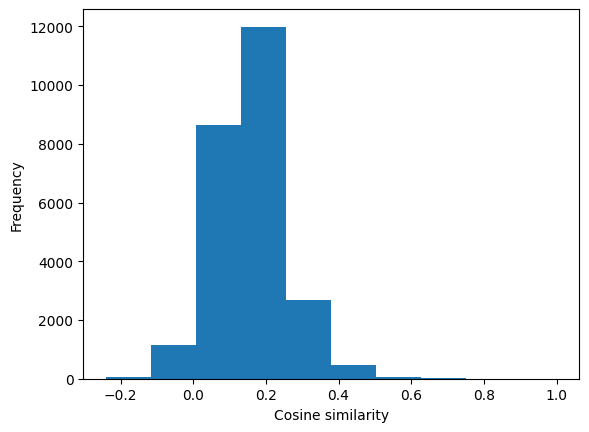

In [41]:
nm_sim = sim_wrods[1]
nm_sim
hist, bins = np.histogram(nm_sim,bins=20)
plt.xlabel("Cosine similarity")
plt.ylabel("Frequency")
plt.hist(nm_sim)

(array([5.540e+02, 3.435e+03, 8.704e+03, 7.240e+03, 3.141e+03, 1.355e+03,
        5.250e+02, 1.110e+02, 1.200e+01, 1.000e+00]),
 array([-0.08207218,  0.02613501,  0.13434219,  0.24254939,  0.35075659,
         0.45896375,  0.56717098,  0.67537814,  0.78358531,  0.89179254,
         0.9999997 ]),
 <BarContainer object of 10 artists>)

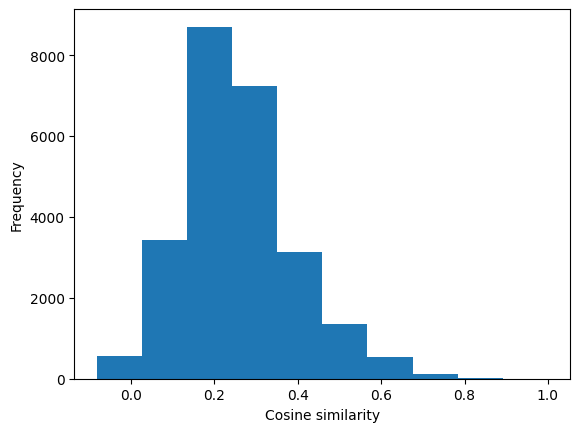

In [42]:
# NNNNsNmNsNsPl
nm_sim = sim_wrods[-1]
nm_sim
hist, bins = np.histogram(nm_sim,bins=20)
plt.xlabel("Cosine similarity")
plt.ylabel("Frequency")
plt.hist(nm_sim)

### generate sentences vector (for making Codebook)

In [51]:
course = "ALL-2020"
actions_file = actions_txt_path + r"\actions_{}.txt".format(course)
vecs = []
actions = []
with open(actions_file, "r") as f:
    t_actions = f.readlines()
    for t_action in t_actions:
        t_action = t_action.rstrip("\n") 
        vec = model.get_sentence_vector(t_action)
        vecs.append(vec)
        actions.append(t_action)

In [52]:
vecs

[array([-0.08331451,  0.02728515, -0.09113341, -0.16485432,  0.06420918,
         0.01046314, -0.07317236, -0.01276521, -0.00744428,  0.01128654,
         0.01890812,  0.02651781,  0.01902905, -0.01771557,  0.02969009,
         0.06205368, -0.00447782,  0.00624017, -0.08502501,  0.00825035,
        -0.07053179, -0.1312878 ,  0.07318811, -0.1132793 , -0.00552191,
         0.06094376, -0.023058  , -0.02896727, -0.06058455, -0.04534509,
         0.03543697, -0.08267003, -0.11254822, -0.03098844, -0.02410261,
        -0.0420507 ,  0.01186207,  0.03400885, -0.0528416 ,  0.0179274 ,
        -0.06231193, -0.04340756, -0.08991175, -0.04869884,  0.02568102,
        -0.09573074, -0.00459773,  0.00476423,  0.02446965,  0.0687829 ,
        -0.03537411, -0.00103014,  0.08182489, -0.08212943, -0.06219158,
        -0.03787135, -0.04019289,  0.0131952 ,  0.03248776,  0.00263518,
        -0.03424439, -0.11842324,  0.00835206, -0.07094233, -0.10995555,
         0.01461652, -0.01482885, -0.06984474, -0.0

In [53]:
df = pd.DataFrame(vecs, index=actions)
df

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
Om NsNm PPsGNm Nm Nm Nl,-0.083315,0.027285,-0.091133,-0.164854,0.064209,0.010463,-0.073172,-0.012765,-0.007444,0.011287,...,-0.107897,-0.073005,0.075700,0.155220,0.015333,0.142523,0.000623,0.224716,0.035070,0.038896
NNsPNsNNsNmNmNm_ Nm Nm NsNsNm Nm NmNm NsPsNmPPNsNm NsEmPPm NsNm NsNNsPl,-0.085222,0.062409,-0.060711,-0.156039,0.143463,0.062358,-0.092578,0.028540,0.002809,0.022281,...,-0.053042,-0.080878,0.074375,0.076794,0.004816,0.072865,0.004450,0.134688,0.058899,-0.010879
NmPmNmPl,-0.001252,0.048336,-0.081426,-0.118651,0.155995,0.030430,-0.156981,0.131601,0.112661,0.218220,...,-0.124072,-0.037887,0.115666,-0.003857,-0.115063,0.205928,0.190411,0.182133,-0.011436,-0.114292
CsOsNNNNNsNNNN_ NNsNNsNNNNsNsN_ Cl,0.086041,0.019689,-0.121803,-0.088498,0.113025,0.135193,0.001805,-0.018339,-0.020624,-0.036749,...,0.050097,0.018320,-0.050024,-0.101317,-0.000379,0.120827,-0.036668,0.060999,-0.035802,0.004098
OsNNNNNNNNNNNN_ NNNNNNl,-0.022943,-0.013644,-0.027153,0.035683,0.010916,0.117197,-0.132012,0.047194,0.091197,0.015513,...,-0.090381,-0.053275,-0.004023,0.023799,0.038674,0.200529,-0.082019,0.076598,-0.055057,0.058366
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
OsJ,0.070254,0.038689,-0.136226,-0.177966,0.126449,0.080844,0.034553,0.088174,0.032847,-0.075175,...,-0.015474,-0.051364,-0.061319,0.040828,0.045180,0.059122,-0.028821,0.026908,0.022176,0.081559
OmNPNNNNl,-0.111154,-0.013637,-0.143043,-0.184279,0.035013,-0.123326,0.094357,0.052194,0.124429,-0.046374,...,-0.085865,-0.092282,-0.094542,0.199450,0.056740,0.155743,-0.084794,-0.062913,-0.031897,0.030142
N,-0.061980,0.121882,-0.225324,-0.317009,0.176640,0.237321,-0.257134,0.086258,0.021694,0.000841,...,0.013747,-0.106202,0.069403,0.164389,-0.034229,0.245892,-0.005738,0.229017,0.012268,-0.011180
OsNsNsOsC,0.105405,-0.032733,-0.324203,-0.243005,0.161674,0.148080,0.014040,0.091676,0.119905,-0.097461,...,-0.022109,-0.140505,-0.003203,0.035401,-0.012084,0.095533,-0.020155,0.061608,-0.027681,0.150864


In [54]:
df.to_csv(r".\data\code_book\for_CodeBook_{}.csv".format(course))